In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('D:\ML Project\Flight_Data_Train.csv')

In [3]:
pd.set_option('Display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2020 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2020 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
    train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
11h         62
11h 45m     62
5h 15m      62
          ... 
36h 25m      1
13h 35m      1
32h 55m      1
29h 30m      1
47h          1
30h 10m      1
33h 45m      1
40h 20m      1
30h 25m      1
19h 50m      1
30h 15m      1
28h 30m      1
32h 20m      1
27h 30m      1
3h 25m       1
5m           1
33h 20m      1
35h 20m      1
37h 10m      1
29h 40m      1
41h 20m      1
29h 10m      1
4h 10m       1
47h 40m      1
31h 50m      1
35h 35m      1
42h 45m      1
42h 5m       1
27h 55m      1
31h 30m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data = train_data.dropna(axis=0)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# train_data['Date_of_Journey'] = pd.to_datetime(train_data.Date_of_Journey)
# train_data['Dep_Time'] = pd.to_datetime(train_data.Dep_Time)
# train_data['Arrival_Time'] = pd.to_datetime(train_data.Arrival_Time)
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey).dt.day
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey).dt.month
train_data['Journey_year'] = pd.to_datetime(train_data.Date_of_Journey).dt.year
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data['Dep_Time'] = pd.to_datetime(train_data.Dep_Time)
train_data['Arrival_Time'] = pd.to_datetime(train_data.Arrival_Time)
train_data['Duration'] = train_data['Arrival_Time'] - train_data['Dep_Time']

train_data['Duration_hour'] = pd.to_datetime(train_data.Duration).dt.hour
train_data['Duration_min'] = pd.to_datetime(train_data.Duration).dt.minute

train_data.drop(['Dep_Time'],axis=1,inplace=True)
train_data.drop(['Arrival_Time'],axis=1,inplace=True)
train_data.drop(['Duration'],axis=1,inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
Airline            10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
Journey_day        10682 non-null int64
Journey_month      10682 non-null int64
Journey_year       10682 non-null int64
Dep_hour           10682 non-null int64
Dep_min            10682 non-null int64
Arrival_hour       10682 non-null int64
Arrival_min        10682 non-null int64
Duration_hour      10682 non-null int64
Duration_min       10682 non-null int64
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


In [13]:
# duration = list(train_data["Duration"])

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
#         if "h" in duration[i]:
#             duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#         else:
#             duration[i] = "0h " + duration[i]           # Adds 0 hour

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [14]:
airline = train_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)

In [15]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [17]:
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [18]:
train_data = train_data.drop(['Route','Additional_Info'],axis=1)

In [19]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,2019,16,50,21,35,4,45


In [20]:
train_data.replace({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops':4}, inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,21,35,4,45


In [22]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [23]:
final_train_data = pd.concat([train_data,airline,source,destination],axis=1)

In [24]:
final_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
final_train_data.drop(['Journey_year'],axis=1,inplace=True)

In [58]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
Airline                                      10682 non-null object
Source                                       10682 non-null object
Destination                                  10682 non-null object
Total_Stops                                  10682 non-null int64
Price                                        10682 non-null int64
Journey_day                                  10682 non-null int64
Journey_month                                10682 non-null int64
Dep_hour                                     10682 non-null int64
Dep_min                                      10682 non-null int64
Arrival_hour                                 10682 non-null int64
Arrival_min                                  10682 non-null int64
Duration_hour                                10682 non-null int64
Duration_min                                 10682 non-null int64
Airline_Air India             

In [59]:
final_train_data.shape

(10682, 33)

In [60]:
test_data = pd.read_csv('D:\ML Project\Flight_Test_set.csv')
pd.set_option('Display.max_columns',None)

In [61]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,6/7/2020 4:25,10h 55m,1 stop,No info
1,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? MAA ? BLR,6:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,5/22/2020 19:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,8:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,6/25/2020 2:45,2h 50m,non-stop,No info


In [62]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey).dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey).dt.month
# train_data['Journey_year'] = pd.to_datetime(train_data.Date_of_Journey).dt.year
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

test_data['Dep_hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data.Dep_Time).dt.minute

test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)
test_data['Duration'] = test_data['Arrival_Time'] - test_data['Dep_Time']

test_data['Duration_hour'] = pd.to_datetime(test_data.Duration).dt.hour
test_data['Duration_min'] = pd.to_datetime(test_data.Duration).dt.minute

test_data.drop(['Dep_Time'],axis=1,inplace=True)
test_data.drop(['Arrival_Time'],axis=1,inplace=True)
test_data.drop(['Duration'],axis=1,inplace=True)

In [63]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
Airline            2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
Journey_day        2671 non-null int64
Journey_month      2671 non-null int64
Dep_hour           2671 non-null int64
Dep_min            2671 non-null int64
Arrival_hour       2671 non-null int64
Arrival_min        2671 non-null int64
Duration_hour      2671 non-null int64
Duration_min       2671 non-null int64
dtypes: int64(8), object(6)
memory usage: 292.2+ KB


In [65]:
airline = test_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
source = test_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
destination = test_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)

In [66]:
test_data = test_data.drop(['Route','Additional_Info'],axis=1)

In [67]:
test_data.replace({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops':4}, inplace=True)

In [68]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [69]:
final_test_data = pd.concat([test_data,airline,source,destination],axis=1)

In [70]:
final_test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [71]:
final_test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
final_test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
# duration = list(final_test_data["Duration"])

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
#         if "h" in duration[i]:
#             duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#         else:
#             duration[i] = "0h " + duration[i]           # Adds 0 hour

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [74]:
final_train_data.shape

(10682, 33)

In [75]:
final_train_data.columns

Index([u'Airline', u'Source', u'Destination', u'Total_Stops', u'Price',
       u'Journey_day', u'Journey_month', u'Dep_hour', u'Dep_min',
       u'Arrival_hour', u'Arrival_min', u'Duration_hour', u'Duration_min',
       u'Airline_Air India', u'Airline_GoAir', u'Airline_IndiGo',
       u'Airline_Jet Airways', u'Airline_Jet Airways Business',
       u'Airline_Multiple carriers',
       u'Airline_Multiple carriers Premium economy', u'Airline_SpiceJet',
       u'Airline_Trujet', u'Airline_Vistara',
       u'Airline_Vistara Premium economy', u'Source_Chennai', u'Source_Delhi',
       u'Source_Kolkata', u'Source_Mumbai', u'Destination_Cochin',
       u'Destination_Delhi', u'Destination_Hyderabad', u'Destination_Kolkata',
       u'Destination_New Delhi'],
      dtype='object')

In [76]:
X = final_train_data.loc[:,['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
Y = final_train_data.iloc[:,4]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

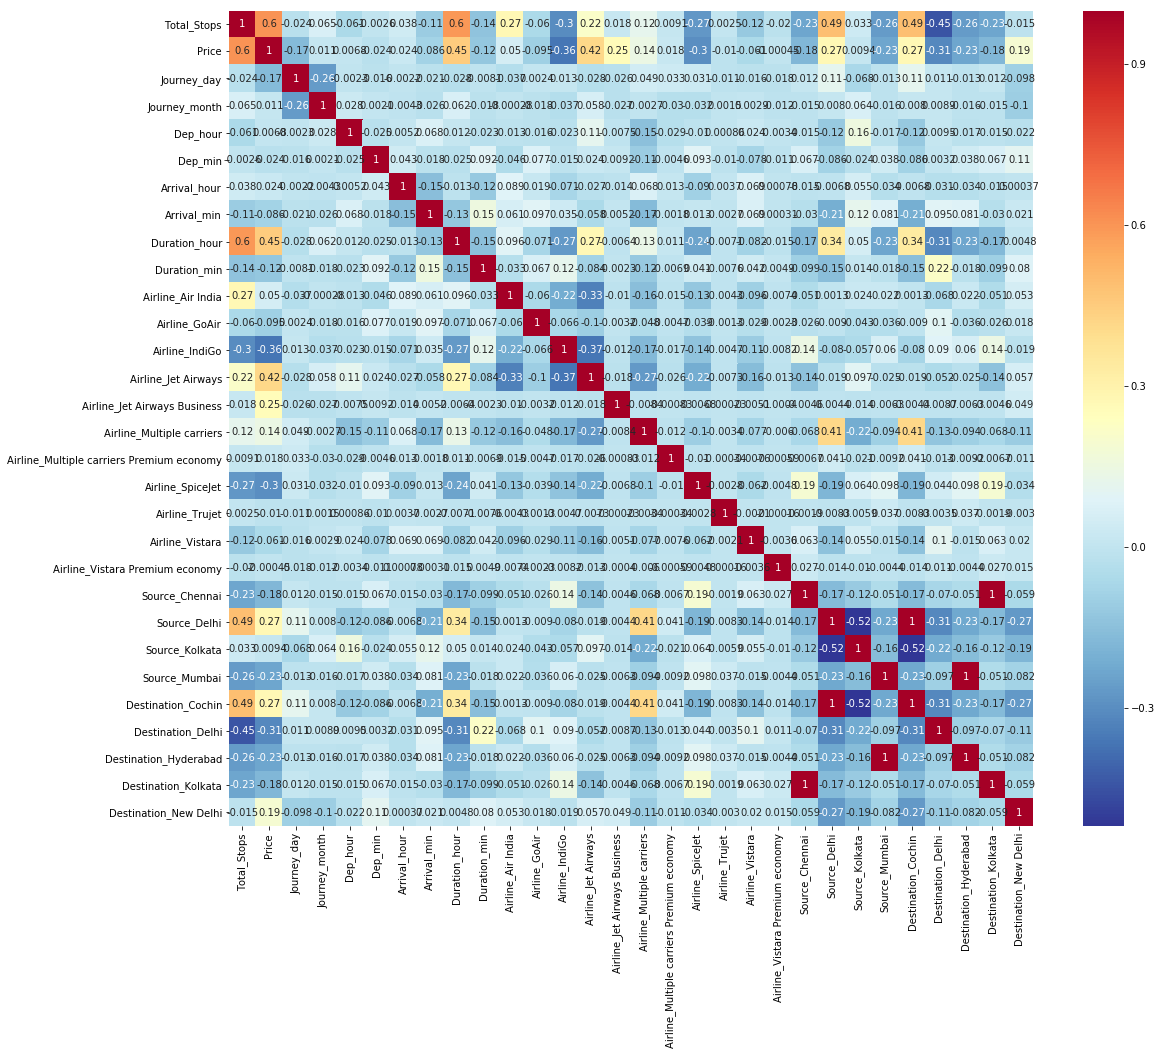

In [78]:
plt.figure(figsize=(18,15))
sns.heatmap(final_train_data.corr(),annot=True,cmap='RdYlBu_r')